# Dragon Real Estate Price Predictor

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].unique()

array([0, 1], dtype=int64)

In [6]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


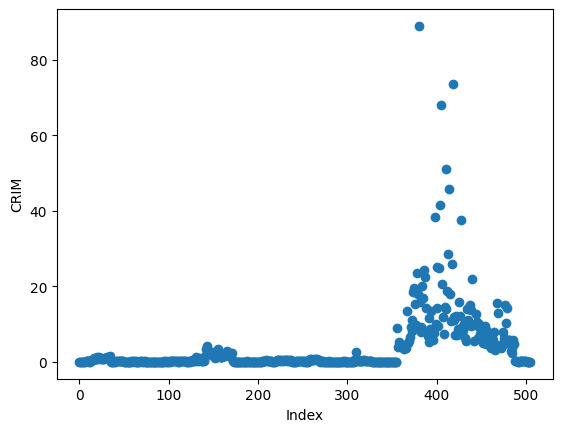

In [8]:
fig, ax = plt.subplots()
ax.scatter(housing.index,housing['CRIM'])
ax.set_ylabel('CRIM')
ax.set_xlabel('Index')
plt.show()

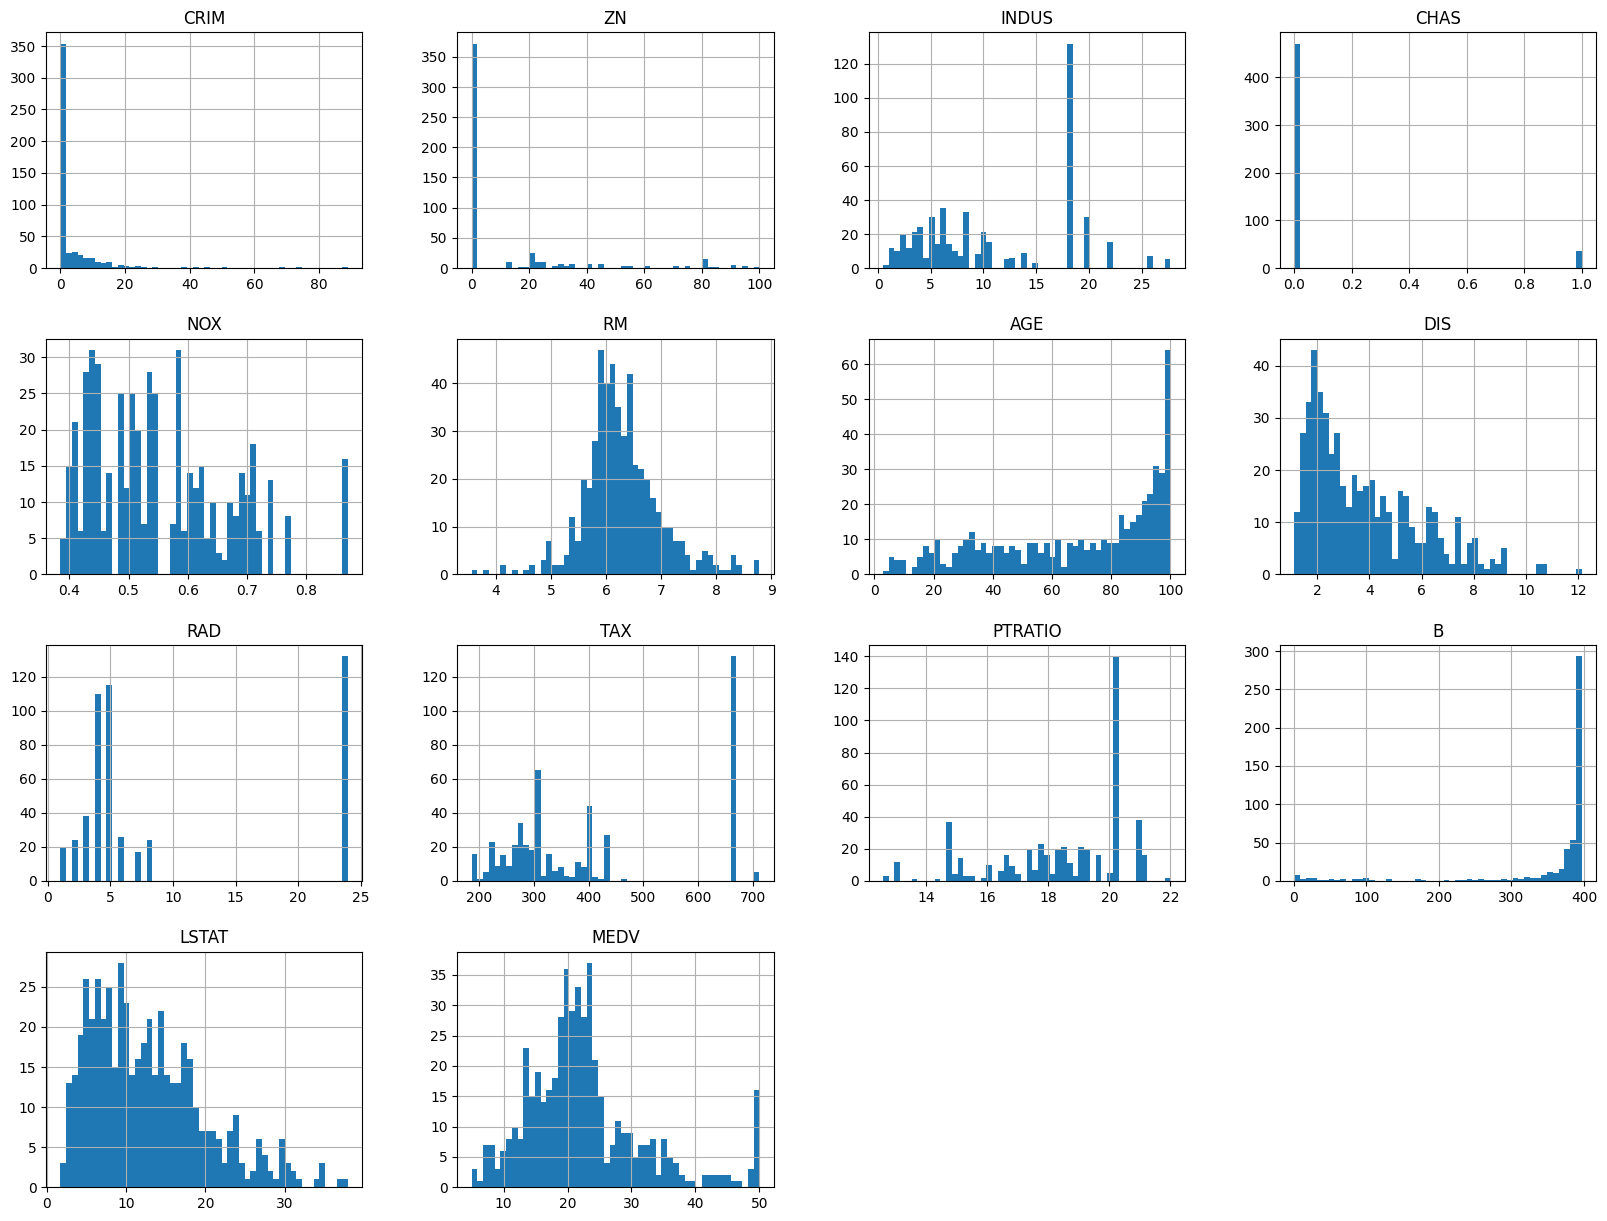

In [9]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Train-Test Splitting

In [10]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(housing, 0.2)

In [12]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 405
Rows in test set: 101



In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



In [14]:
# sklearn values mught be different because of rounding off error

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [63]:
strat_test_set.to_csv('strat_test_set.csv')

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [17]:
housing_train = strat_train_set.copy()
housing_test = strat_test_set.copy()

In [18]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV']

## Looking for Correlations

In [19]:
housing1=pd.read_csv('data.csv')
corr_matrix = housing1.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [20]:
from pandas.plotting import scatter_matrix

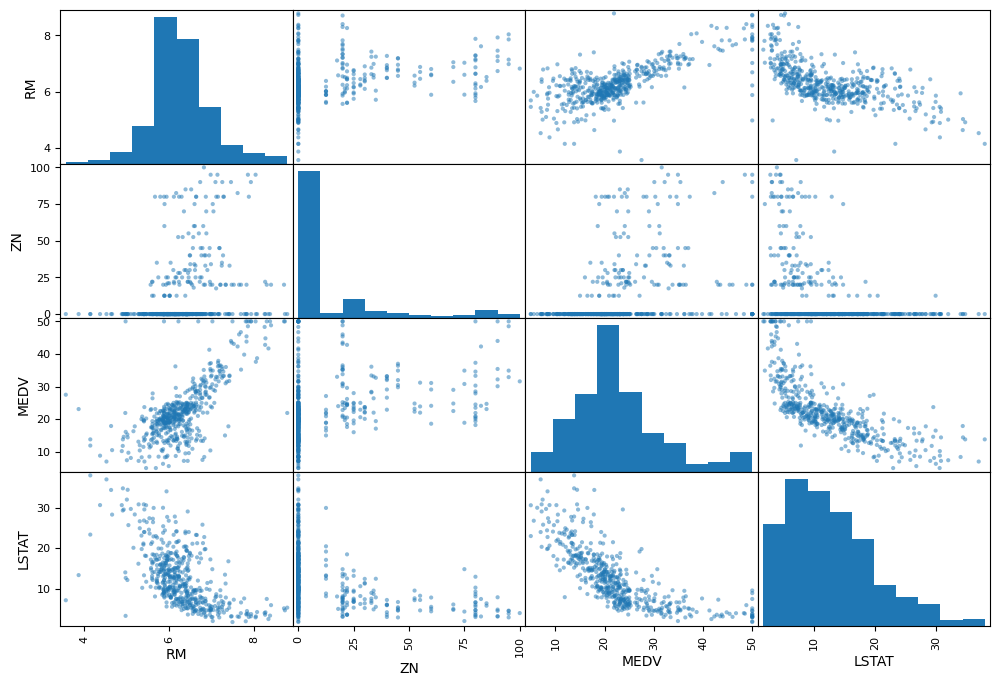

In [21]:
attributes = ['RM', 'ZN', 'MEDV', 'LSTAT']
scatter_matrix(housing1[attributes], figsize = (12,8))
plt.show()

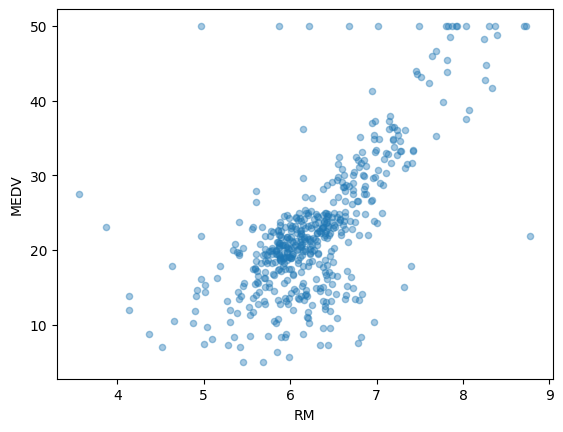

In [22]:
housing1.plot(kind="scatter", x = "RM", y = "MEDV", alpha=0.4)
plt.show()

## Trying out Attribute Combinations

In [23]:
housing1["TAXRM"]=housing1["TAX"]/housing["RM"]

In [24]:
housing1["TAXRM"].head()

0    45.019011
1          NaN
2    33.681280
3    31.723350
4    31.061984
Name: TAXRM, dtype: float64

In [25]:
corr_matrix = housing1.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.525160
LSTAT     -0.737663
Name: MEDV, dtype: float64

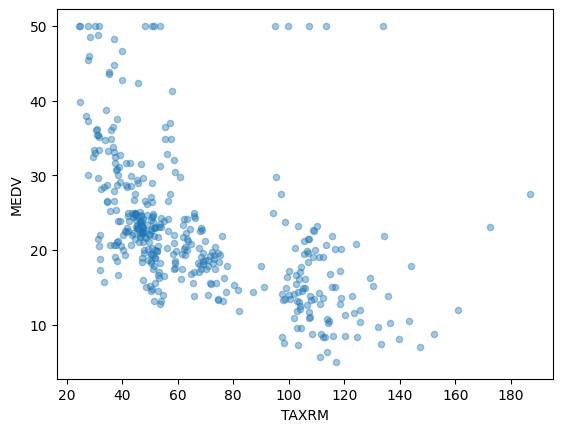

In [26]:
housing1.plot(kind="scatter", x = "TAXRM", y = "MEDV", alpha=0.4)
plt.show()

## Missing Attributes

To take care of missing attributes, you have three options:
1. Get rid of the missing data points
2. Get rid of the whole attribute
3. Set the value to some value(0, mean, median) <br>
We are assuming few RM values to be missing as it has high correlation.

In [27]:
a = housing.dropna(subset=["RM"]) # Option1
a.shape
# a will not change as we dont have na values

(404, 13)

In [28]:
housing.drop("RM", axis=1) #OPtion2
#note that there is no RM column but will not affect original dataframe

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,82.6,1.7455,5,403,14.7,88.01,15.02
423,7.05042,0.0,18.10,0,0.614,85.1,2.0218,24,666,20.2,2.52,23.29
98,0.08187,0.0,2.89,0,0.445,36.9,3.4952,2,276,18.0,393.53,3.57
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13


In [29]:
median = housing["RM"].median() # Compute median Option 3
housing["RM"].fillna(median)
#Original dataframe remains unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
print('Values for imputer:',imputer.statistics_)
print('Shape:',imputer.statistics_.shape)

Values for imputer: [2.86735e-01 0.00000e+00 9.90000e+00 0.00000e+00 5.38000e-01 6.21000e+00
 7.82000e+01 3.12220e+00 5.00000e+00 3.37000e+02 1.90000e+01 3.90955e+02
 1.15700e+01]
Shape: (13,)


In [32]:
X = imputer.transform(housing)

In [33]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [34]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, 3 types of objects:
1. Estimators
- They estimate parameters based on a database. eg. Imputer
- It has a fit method and transform method.
- Fit methods - Fits the dataset and calculates internal parameters. 
2. Transformers
- transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors
- LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also has a score() function which will evaluate the predictions.

## Feature Scaling

Two types of feature-scaling methods primarily exist:
1. Min-max scaling (Normalisation)
  (value-min)/(max-min)
  Sklearn proveds a class called MinMaxScaler for this.

2. Standardisation
   (value-mean)/std
   Sklearn provides a class called StandardScaler for this.


## Creating a Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [37]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [38]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for Dragon Real Estate

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
# model = LinearRegression()

In [41]:
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [42]:
some_data = housing.iloc[:5]

In [43]:
some_labels = housing_labels.iloc[:5]

In [44]:
prepared_data = my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([22.508, 25.587, 16.363, 23.376, 23.391])

In [46]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [49]:
mse

1.3529252128712854

## Using better evaluation technique - Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring='neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In [52]:
rmse_scores

array([2.79289168, 2.69441597, 4.40018895, 2.56972379, 3.33073436,
       2.62687167, 4.77007351, 3.27403209, 3.38378214, 3.16691711])

In [53]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [54]:
print_scores(rmse_scores)

Scores: [2.79289168 2.69441597 4.40018895 2.56972379 3.33073436 2.62687167
 4.77007351 3.27403209 3.38378214 3.16691711]
Mean: 3.3009631251857217
Standard Deviation: 0.7076841067486248


## Saving the model

In [55]:
from joblib import dump, load

In [56]:
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [58]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"]
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

2.948844070638726

In [61]:
print(final_predictions, list(Y_test))

[24.895 11.466 25.439 21.974 18.471 14.873 19.897 14.416 31.435 40.68
 20.067 11.776 24.004 28.999 19.503 10.679 31.58  14.492 23.586 18.94
 19.767 17.955 17.534 22.073 18.429 30.549 16.416 32.69   8.952 33.616
 23.715 21.26  22.98  10.808 20.924 11.293 42.541 24.308 23.292 41.623
 23.753 29.423 20.594 20.912 19.565 33.578 44.468 19.92  20.344 21.768
 21.492 14.514 21.169 15.094 24.771 32.651 42.389 28.135 19.353 20.837
 47.322  9.96  18.674 24.579 15.057 32.746 19.461 18.158 19.014 33.84
 27.27  22.85  21.519 22.436 34.997 12.793 15.94  20.048 20.726 21.379
 22.303 21.651 14.429 22.832 20.848 21.168 13.933 21.346 22.005 23.151
 18.865 27.24   7.276 26.14  18.817 29.887 19.692 31.073 14.663 26.607
 20.713 20.087] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 4

In [64]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24141041, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])